In [190]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab

# Useful plotting thingies:
%pylab.rcParams['figure.figsize'] = 16, 16
matplotlib inline
plt.style.use('ggplot')


SyntaxError: invalid syntax (<ipython-input-190-43073f2dab6e>, line 8)

In [191]:
import tables as tb
from sklearn.preprocessing import Normalizer, scale

# Set up the experimental matrices:
targets = ['ADAS11_bl', 'ADAS13_bl', 'MMSE_bl']
varnames = ['CT_VOL', 'L_HC_VOL', 'R_HC_VOL']
targets_regex = '|'.join(['^{}$'.format(t) for t in targets])
#modalities = ['CT', 'L_HC', 'R_HC']
modalities = ['CT']
l_segment_regex = '^L_HC_'
r_segment_regex = '^R_HC_'
modalities_regex = '|'.join(['^{}_'.format(m) for m in modalities])

matrices = []
l_D = []
r_D = []
for split in ['train', 'valid', 'test']:
    frame = pd.read_pickle('/projects/francisco/data/ADNI/cli_ct_seg_fused_{}.pkl'.format(split))
    ct = frame.filter(regex=modalities_regex).as_matrix()
    y_cur = frame.filter(regex=targets_regex).as_matrix()
    y_cur[np.isnan(y_cur)] = np.nanmean(y_cur)
    l_segs = frame.filter(regex=l_segment_regex).as_matrix()
    r_segs = frame.filter(regex=r_segment_regex).as_matrix()
    ct_vol = np.sum(ct, axis=1)
    l_hc_vol = np.sum(l_segs, axis=1)
    r_hc_vol = np.sum(r_segs, axis=1)
    matrices.append([y_cur, ct_vol, l_hc_vol, r_hc_vol])
    

In [192]:
from matplotlib import pyplot as plt

#frame = pd.read_pickle('/projects/francisco/data/ADNI/cli_ct_seg_fused_train.pkl'.format(split))
frame = pd.read_pickle('/projects/francisco/data/ADNI/master_fused.pkl'.format(split))
l_segs = frame.filter(regex=l_segment_regex).as_matrix()
r_segs = frame.filter(regex=r_segment_regex).as_matrix()
ct = frame.filter(regex=modalities_regex).as_matrix()
y_cur = frame.filter(regex=targets_regex).as_matrix()
y_cur[np.isnan(y_cur)] = np.nanmean(y_cur)
classes = frame['DX_bl'].as_matrix()
c = classes
c[c=='AD'] = 0
c[c=='CN'] = 1
c[c=='LMCI'] = 2

print classes

[1 1 0 1 2 2 0 0 2 0 0 2 1 2 1 1 2 1 1 0 2 2 0 2 2 2 2 1 2 1 1 0 0 2 1 1 0
 2 1 1 2 1 1 2 2 2 2 0 2 2 1 0 0 1 1 1 2 2 0 0 1 2 1 1 0 0 2 0 1 1 1 1 1 1
 0 2 0 2 2 2 2 2 2 2 1 0 0 0 0 2 2 1 2 1 2 2 1 2 2 2 1 0 2 1 2 0 2 0 2 1 2
 0 0 1 1 1 2 2 0 2 1 1 2 2 0 2 2 2 2 2 0 2 2 2 2 2 0 0 1 2 1 0 0 1 1 2 1 2
 2 2 2 2 0 2 2 0 1 0 1 0 2 0 2 1 1 0 2 2 2 2 2 2 2 2 1 2 1 1 1 0 0 2 2 2 2
 2 2 2 2 1 1 2 2 2 1 0 1 1 1 0 0 2 2 2 1 1 2 2 2 1 0 2 2 2 2 2 0 2 0 2 0 0
 2 1 0 1 1 1 2 2 2 0 2 0 2 2 2 2 2 0 2 0 2 1 2 2 2 0 1 0 2 2 0 1 1 2 2 0 0
 1 2 2 2 1 2 2 0 2 0 1 2 1 0 2 1 2 1 1 1 1 2 2 0 0 2 0 2 2 1 1 2 2 0 1 2 1
 2 1 2 2 0 1 2 2 2 0 1 2 2 2 1 1 2 1 1 2 2 2 2 2 0 2 2 1 1 2 2 2 2 2 2 1 1
 2 2 0 2 2 2 2 2 0 2 2 1 2 0 2 2 2 2 2 1 2 2 2 2 0 2 0 1 1 1 2 1 2 2 2 2 2
 0 0 0 0 0 1 0 2 2 2 1 0 2 2 1 1 0 2 2 0 2 1 2 1 2 2 2 2 0 0 0 0 0 1 1 2 2
 1 2 2 2 2 1 1 2 2 1 1 1 1 2 0 2 2 1 2 1 2 1 2 2 0 2 2 1 1 2 1 1 2 2 0 0 2
 1 1 2 2 2 0 2 2 0 2 1 1 2 2 2 0 1 2 2 1 1 0 0 1 2 2 2 2 0 2 1 1 1 1 0 2 2
 2 0 0 0 0 1 0 1 2 1 1 1 

In [193]:
import h5py as h5

fused_segmentations_path = '/projects/nikhil/miccai/input_data_comb/ad_mci_cn_{}.h5'



4421.93
4385.92
4453.17
230.80340564
241.097745321
236.610663732
(153,)


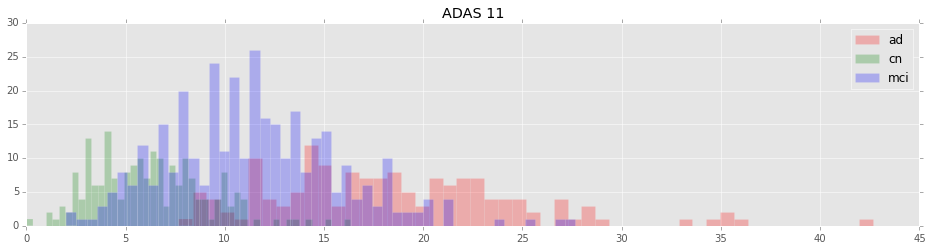

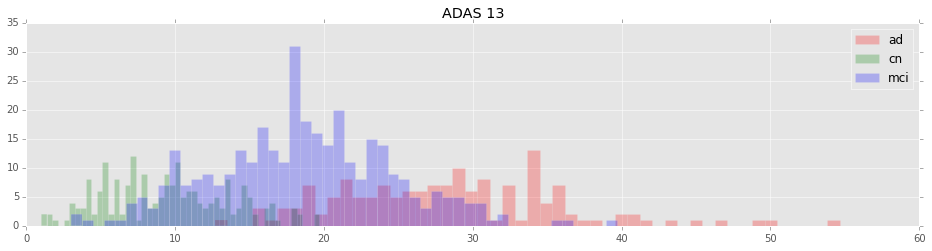

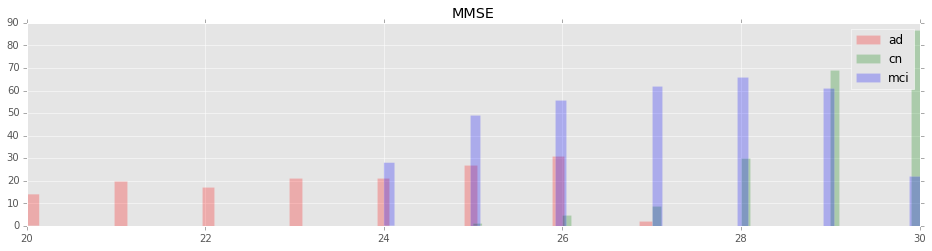

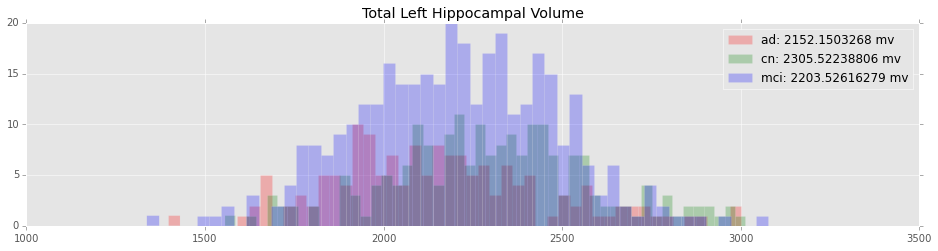

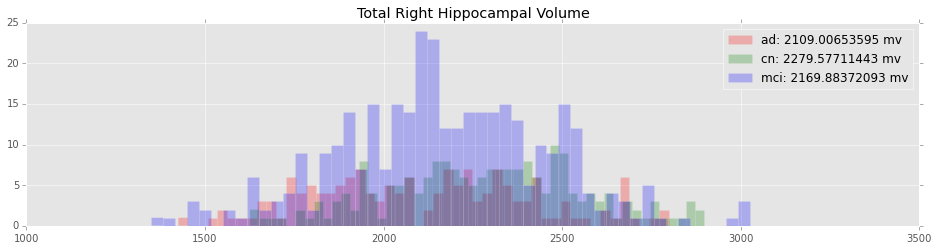

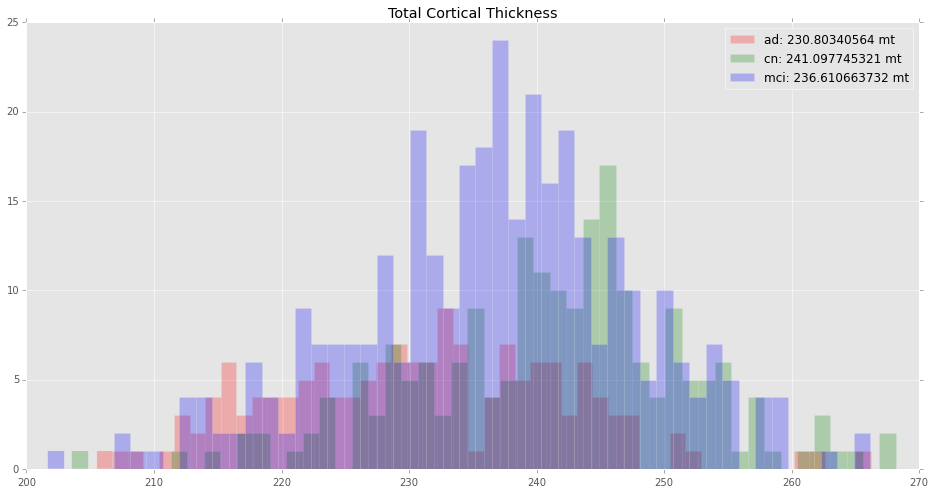

In [194]:
indad = np.where(classes==0)[0]
indcn = np.where(classes==1)[0]
indmci = np.where(classes==2)[0]

l_segs_ad = l_segs[indad]
r_segs_ad = r_segs[indad]

l_segs_cn = l_segs[indcn]
r_segs_cn = r_segs[indcn]

l_segs_mci = l_segs[indmci]
r_segs_mci = r_segs[indmci]

l_vols_ad = np.sum(l_segs_ad, axis=1)
l_vols_cn = np.sum(l_segs_cn, axis=1)
l_vols_mci = np.sum(l_segs_mci, axis=1)

r_vols_ad = np.sum(r_segs_ad, axis=1)
r_vols_cn = np.sum(r_segs_cn, axis=1)
r_vols_mci = np.sum(r_segs_mci, axis=1)

ct_ad = ct[indad]
ct_cn = ct[indcn]
ct_mci = ct[indmci]

adas11_ad = y_cur[indad,0]
adas11_cn = y_cur[indcn,0]
adas11_mci = y_cur[indmci,0]

adas13_ad = y_cur[indad,1]
adas13_cn = y_cur[indcn,1]
adas13_mci = y_cur[indmci,1]

mmse_ad = y_cur[indad,2]
mmse_cn = y_cur[indcn,2]
mmse_mci = y_cur[indmci,2]

total_ct_ad = np.sum(ct_ad, axis=1)
total_ct_cn = np.sum(ct_cn, axis=1)
total_ct_mci = np.sum(ct_mci, axis=1)

print np.mean(vols_ad)
print np.mean(vols_cn)
print np.mean(vols_mci)
print np.mean(total_ct_ad)
print np.mean(total_ct_cn)
print np.mean(total_ct_mci)
print adas11_ad.shape
pylab.rcParams['figure.figsize'] = 16, 8

plt.subplot(2,1,1)
plt.hist(adas11_ad, bins=50,color='r', alpha=0.25, label='ad')
plt.hist(adas11_cn, bins=50,color='g', alpha=0.25, label='cn')
plt.hist(adas11_mci, bins=50,color='b', alpha=0.25, label='mci')
plt.legend()
plt.title('ADAS 11')
plt.show()

plt.subplot(2,1,1)
plt.hist(adas13_ad, bins=50,color='r', alpha=0.25, label='ad')
plt.hist(adas13_cn, bins=50,color='g', alpha=0.25, label='cn')
plt.hist(adas13_mci, bins=50,color='b', alpha=0.25, label='mci')
plt.legend()
plt.title('ADAS 13')
plt.show()

plt.subplot(2,1,1)
plt.hist(mmse_ad, bins=50,color='r', alpha=0.25, label='ad')
plt.hist(mmse_cn, bins=50,color='g', alpha=0.25, label='cn')
plt.hist(mmse_mci, bins=50,color='b', alpha=0.25, label='mci')
plt.legend()
plt.title('MMSE')
plt.show()


plt.subplot(2,1,1)
plt.hist(l_vols_ad, bins=50, color='r', alpha=0.25, label='ad: {} mv'.format(np.mean(l_vols_ad)))
plt.hist(l_vols_cn, bins=50, color='g', alpha=0.25, label='cn: {} mv'.format(np.mean(l_vols_cn)))
plt.hist(l_vols_mci, bins=50, color='b', alpha=0.25, label='mci: {} mv'.format(np.mean(l_vols_mci)))
plt.legend()
plt.title('Total Left Hippocampal Volume')
plt.show()

plt.subplot(2,1,2)
plt.hist(r_vols_ad, bins=50,color='r', alpha=0.25, label='ad: {} mv'.format(np.mean(r_vols_ad)))
plt.hist(r_vols_cn, bins=50,color='g', alpha=0.25, label='cn: {} mv'.format(np.mean(r_vols_cn)))
plt.hist(r_vols_mci, bins=50,color='b', alpha=0.25, label='mci: {} mv'.format(np.mean(r_vols_mci)))
plt.legend()
plt.title('Total Right Hippocampal Volume')
plt.show()

plt.subplot(1,1,1)
plt.hist(total_ct_ad, bins=50,color='r', alpha=0.25, label='ad: {} mt'.format(np.mean(total_ct_ad)))
plt.hist(total_ct_cn, bins=50,color='g', alpha=0.25, label='cn: {} mt'.format(np.mean(total_ct_cn)))
plt.hist(total_ct_mci, bins=50,color='b', alpha=0.25, label='mci: {} mt'.format(np.mean(total_ct_mci)))
plt.legend()
plt.title('Total Cortical Thickness')
plt.show()
pylab.rcParams['figure.figsize'] = 16, 16


In [195]:
def adjusted_r2(y_hat, y, p, n):
    """
    And I quote:
    "adjusted R2 is a comparative measure of suitability of alternative nested sets of explanators"
    """
    r2 = metrics.r2_score(y_hat, y)
    adj_r2 = r2 - (1 - r2) * (p / n - p - 1)
    return r2
    

In [201]:
from sklearn.linear_model import SGDRegressor, BayesianRidge, RidgeCV
from sklearn.decomposition import RandomizedPCA
from sklearn.dummy import DummyRegressor
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, RFE
from sklearn.feature_selection import f_regression
from sklearn import metrics
import scipy

num_targets = len(targets)
num_models = 1 # Includes dummy model
k_classifiers = []
k_selectors = []
stats = np.zeros(shape=(3, 3, num_models, num_targets))
for i in range(3):
    X, y = matrices[0][i+1].reshape((-1,1)), matrices[0][0]
    X_v, y_v = matrices[1][i+1].reshape((-1,1)), matrices[1][0]
    X_t, y_t = matrices[2][i+1].reshape((-1,1)), matrices[2][0]
    
    
    cur_triple = []
    cur_sel_triple = []
    for t in range(0,len(targets)):
        
        dummy_regressor = DummyRegressor(strategy='mean')
        #classifier = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=None, fit_intercept=True, scoring=None, normalize=False)
        slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(X,y[:,t])
        classifiers = [classifier, dummy_regressor]
        
        # Train classifiers on transformed training X
        #print X
        #print y[:,t]
    
#         classifier.fit(X, y[:,t])
#         dummy_regressor.fit(X, y[:,t])
        
        # Save classifiers for visualizing on later
        cur_triple.append((classifier, dummy_regressor))

        # Predict on validation data and log stats
        y_hat_v = classifier.predict(X_v)
        y_hat_vd = dummy_regressor.predict(X_v)
        stats[i,0,0,t] =  std_err
        stats[i,1,0,t] =  r_value
        stats[i,2,0,t] =  p_value
    k_selectors.append(cur_sel_triple)
    k_classifiers.append(cur_triple)



ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [197]:
print stats.shape
print len(k_classifiers)
print k_classifiers
print X_v.shape

(3, 3, 3, 3)
3
[[(RidgeCV(alphas=[0.1, 1.0, 10.0], cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False), DummyRegressor(constant=None, quantile=None, strategy='mean')), (RidgeCV(alphas=[0.1, 1.0, 10.0], cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False), DummyRegressor(constant=None, quantile=None, strategy='mean')), (RidgeCV(alphas=[0.1, 1.0, 10.0], cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False), DummyRegressor(constant=None, quantile=None, strategy='mean'))], [(RidgeCV(alphas=[0.1, 1.0, 10.0], cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False), DummyRegressor(constant=None, quantile=None, strategy='mean')), (RidgeCV(alphas=[0.1, 1.0, 10.0], cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False), DummyRegressor(constant=None, quantile=N

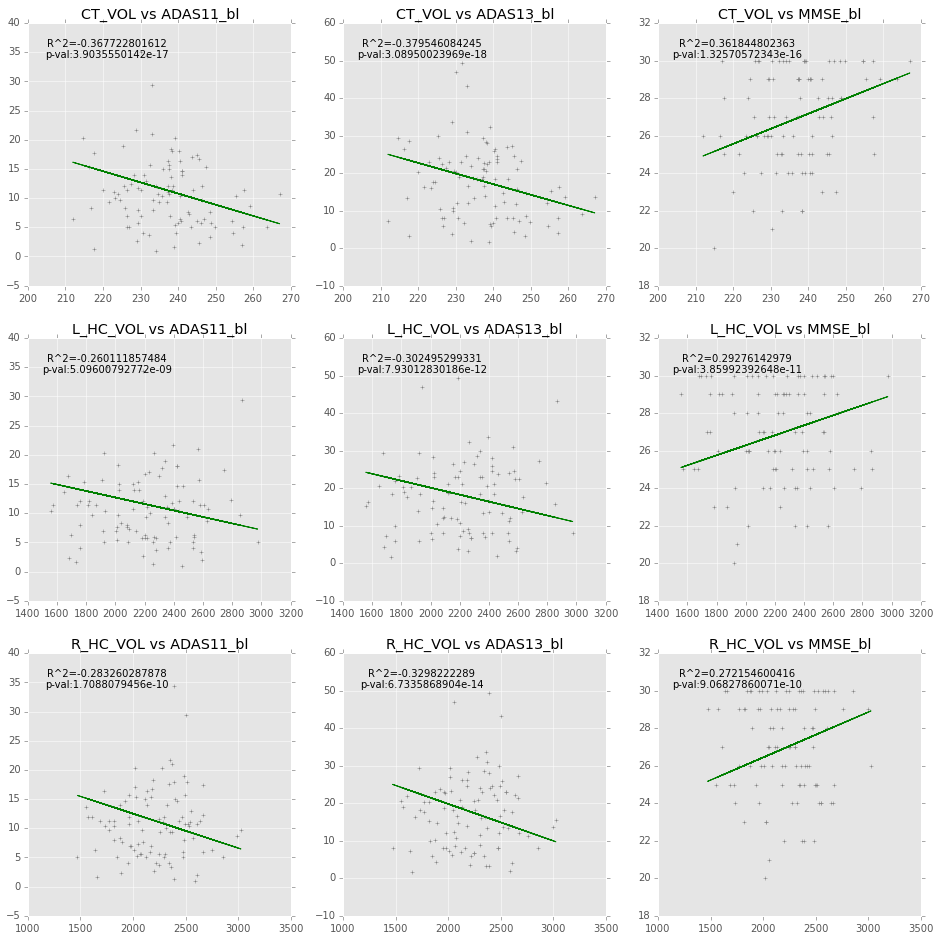

In [211]:
from tabulate import tabulate

f = 0
for v, vname in enumerate(varnames):
    X, y = matrices[0][v+1].reshape((-1,1)), matrices[0][0]
    X_v, y_v = matrices[1][v+1].reshape((-1,1)), matrices[1][0]
    for t, tname in enumerate(targets):
        f += 1  
        ax=plt.subplot(3,3,f)
        plt.title('{} vs {}'.format(vname, tname))
        slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(X.ravel(),y[:,t])
        y_hat_v = intercept + slope * X_v
        
        # Plot outputs
        plt.scatter(X_v, y_v[:,t], marker='+', color='gray')
        plt.plot(X_v, y_hat_v, color='green', linewidth=1)
        plt.text(0.3, 0.9,'R={}\np-val:{}'.format(r_value, p_value), horizontalalignment='center', verticalalignment='center', transform = ax.transAxes)

plt.grid()    
plt.show()

